### <font color="magenta"> Get Data

In [12]:
import pandas as pd

In [13]:
import sqlite3

In [14]:
billboard = pd.read_csv("../charts.csv")

In [15]:
billboard

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [16]:
con = sqlite3.connect("../database.sqlite")

# Load the data into a DataFrame
reviews_df = pd.read_sql_query("SELECT * from reviews", con)

# Select only data for 2002
#surveys2002 = surveys_df[surveys_df.year == 2002]

# Write the new DataFrame to a new SQLite table
#surveys2002.to_sql("surveys2002", con, if_exists="replace")

con.close()

In [17]:
reviews_df

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18389,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


### <font color="magenta"> Clean data to merge

In [18]:
billboard['artist'] = billboard['artist'].apply(str.lower)
billboard['artist'] = billboard['artist'].apply(str.strip)
reviews_df['artist'] = reviews_df['artist'].apply(str.lower)
reviews_df['artist'] = reviews_df['artist'].apply(str.strip)

In [19]:
billboard['song'] = billboard['song'].apply(str.lower)
billboard['song'] = billboard['song'].apply(str.strip)
reviews_df['title'] = reviews_df['title'].apply(str.lower)
reviews_df['title'] = reviews_df['title'].apply(str.strip)

### <font color="magenta"> Merge

In [20]:
merge = reviews_df.merge(billboard, left_on = "title", right_on="song", how="inner")
merge['artist'] = merge['artist_y']
merge = merge.drop(['artist_x', 'artist_y','title','author_type'], axis=1)

In [21]:
merge

,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year,date,rank,song,last-week,peak-rank,weeks-on-board,artist
0,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016,2016-12-31,29,4 your eyez only,NaN,29,1,j. cole
1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-09-06,81,out of time,85.0,81,3,the rolling stones
2,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-08-30,85,out of time,90.0,85,2,the rolling stones
3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-08-23,90,out of time,NaN,90,1,the rolling stones
4,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014,1975-09-06,81,out of time,85.0,81,3,the rolling stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22974,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999,2000-07-29,72,californication,NaN,72,1,red hot chili peppers
22975,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-28,98,dna,87.0,67,4,bts
22976,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-21,87,dna,67.0,67,3,bts
22977,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-14,67,dna,85.0,67,2,bts


### <font color="magenta"> Change column order to read easier

In [22]:
cols = list(merge.columns.values)

In [23]:
cols

['reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'date',
 'rank',
 'song',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'artist']

In [24]:
cols =  ['date',
 'rank',
 'song','artist',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year']

In [25]:
merge = merge[cols]

### <font color="magenta"> Drop duplicate reviews (if they have same url)

not sure why there are so many duplicates, might want to check if different reviews go to same URL.

In [26]:
merge.drop_duplicates(subset=['url'],keep='last')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
3,1975-08-23,90,out of time,the rolling stones,NaN,90,1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
6,1975-08-23,90,out of time,the rolling stones,NaN,90,1,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014
47,2016-10-29,5,24k magic,bruno mars,NaN,5,1,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
77,2016-10-08,40,starboy,the weeknd featuring daft punk,NaN,40,1,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22951,1961-02-20,24,surrender,elvis presley with the jordanaires,NaN,24,1,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22955,2020-11-14,92,stay down,"lil durk, 6lack & young thug",NaN,92,1,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22974,2000-07-29,72,californication,red hot chili peppers,NaN,72,1,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


### <font color="magenta"> Checking number of unique songs in merge

In [27]:
unique = merge.drop_duplicates(subset ="song")

In [28]:
unique

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
1,1975-09-06,81,out of time,the rolling stones,85.0,81,3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
7,2017-08-05,50,24k magic,bruno mars,48.0,4,41,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
48,2017-04-29,39,starboy,the weeknd featuring daft punk,37.0,1,30,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
78,2021-11-06,63,woman,doja cat,65.0,62,13,22644,http://pitchfork.com/reviews/albums/22644-woman/,5.2,0,mehan jayasuriya,2016-11-29,1,29,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22914,1991-08-10,96,surrender,trixter,84.0,72,10,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22952,2021-02-13,87,stay down,"lil durk, 6lack & young thug",NaN,73,4,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22956,2000-12-02,97,californication,red hot chili peppers,89.0,69,19,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


### <font color="magenta"> Starting to look at scores by song

In [29]:
groups = merge.groupby("song")

In [30]:
groups["score"].value_counts()

song                score
#1                  4.9      20
1-2-3               6.1      39
18                  2.6       1
19                  7.9      14
1999                4.8      30
                             ..
you should be here  7.4      20
young americans     8.7      11
young forever       3.4      25
youth               4.9      20
yuck                8.1       1
Name: score, Length: 853, dtype: int64

### <font color="magenta"> Data frame of songs that have reviews but have not been on the Billboard "Top 100"

In [31]:
nottop = reviews_df[~reviews_df['title'].isin(billboard['song'])]

In [32]:
nottop = nottop.drop_duplicates(subset=['url'],keep='last')

In [33]:
nottop

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18387,6372,cd 2,pole,http://pitchfork.com/reviews/albums/6372-cd-2/,7.2,0,mark richard-san,None,1999-02-01,0,1,2,1999
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


In [34]:
group = nottop.groupby("title")

In [35]:
group["score"].value_counts()

title             score
                  5.0      1
                  8.4      1
"cassette" ep     7.8      1
"couples"         5.8      1
"evidence" 12"    7.6      1
                          ..
zummo with an x   8.0      1
zwei              7.3      1
zwei photonen ep  8.0      1
zweite meer       6.9      1
{awayland}        5.5      1
Name: score, Length: 17494, dtype: int64

### <font color="magenta"> Starting the graphs

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
rating_top = unique.score.to_list()
rating_nottop = nottop.score.to_list()

In [56]:
billboard_rank = unique['peak-rank'].to_list()

46.51355206847361

In [51]:
title_top = unique.song.to_list()
title_nottop = nottop.title.to_list()

In [57]:
unique.score.mean()

6.968188302425108

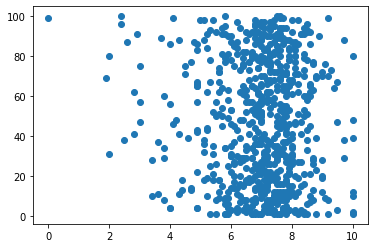

In [52]:
plt.scatter(x= rating_top, y = billboard_rank)

### <font color="magenta"> the majority of billboard hot 100 songs are rank at 6.97 with no apparent positive or negative trend between rating and location on the billboard hot 100